In [4]:
import pandas as pd
from datetime import datetime, timedelta

TIME_FORMAT = '%Y-%m-%d %H:%M:%S'

from steevebase.io import mongo_factory
from voter.config import CONFIG

mongo_address = CONFIG['DATABASE']['ADDRESS']
db = mongo_factory(mongo_address)

clean_posts_col = db.get_collection("clean_posts")
past_comments_col = db.get_collection('past_comments')
raw_votes_col = db.get_collection("raw_votes")

print('db stores %.3f GB of data' % (db.command('dbstats')['storageSize']/1024/1024/1024))
# print('db stores %.3f GB of data' % (db.command('dbstats')['dataSize']/1024/1024/1024))

db stores 5.273 GB of data


## Create collection with compound index

In [53]:
# RECOS_ID_COL_NAME
new_collection_name = 'user_reco_ids'
db.create_collection(new_collection_name)

Collection(Database(MongoClient(host=['localhost:26999'], document_class=dict, tz_aware=False, connect=True), 'steem'), 'user_reco_ids')

In [54]:
new_collection = db.get_collection(new_collection_name)

In [107]:
new_collection.remove({'_id': 'vortac'})

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  """Entry point for launching an IPython kernel.


{'ok': 1, 'n': 1}

In [105]:
[v for v in new_collection.find()]

[{'_id': 'fel1xw'},
 {'_id': 'shadowspub'},
 {'_id': 'fingersik'},
 {'_id': 'yacobh'},
 {'_id': 'bien'},
 {'_id': 'altafalazzam'},
 {'_id': 'maulida'},
 {'_id': 'hatem007'},
 {'_id': 'fetch'},
 {'_id': 'whiteblood'},
 {'_id': 'isnochys'},
 {'_id': 'gtg'},
 {'_id': 'kharrazi'},
 {'_id': 'themarkymark'},
 {'_id': 'steemtester'},
 {'_id': 'pjau'},
 {'_id': 'carn'},
 {'_id': 'azissuloh'},
 {'_id': 'amryksr'},
 {'_id': 'mapala.tester'},
 {'_id': 'mor'},
 {'_id': 'void'},
 {'_id': 'steeveapp'},
 {'_id': '__curie'},
 {'_id': 'donkeypong'},
 {'_id': 'hr1'}]

In [94]:
# all_users = ['shadowspub', 'fingersik', 'sniffnscurry', 'steemit-jp', 'vortac', 'artemisnorth', 'abit', 'btu', 'deeek', 'timsaid', 'gtg', 'yacobh', 'bien', 'altafalazzam', 'maulida', 'fetch', 'whiteblood', 'isnochys', 'kharrazi', 'carn', 'azissuloh', 'amryksr', 'hatem007', 'mapala.tester']
all_users = ['fel1xw', 'shadowspub', 'fingersik', 'yacobh', 'bien', 'altafalazzam', 'maulida', 'hatem007', 'fetch', 'whiteblood', 'isnochys', 'gtg', 'kharrazi', 'themarkymark', 'steemtester', 'pjau', 'carn', 'azissuloh', 'amryksr', 'mapala.tester', 'hr1', 'mor', 'void', 'steeveapp']

for _id in all_users:
    query = {'_id': _id}
    if new_collection.find(query).count() == 0:
        new_collection.insert_one(query)


/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


In [68]:
new_collection.remove({'_id': 'hr1'})

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  """Entry point for launching an IPython kernel.


{'ok': 1, 'n': 1}

In [73]:
new_reco_collection.remove()

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  """Entry point for launching an IPython kernel.


{'ok': 1, 'n': 696}

In [86]:
[v for v in new_reco_collection.find({'reco_id': 'hr1'})]

[{'_id': ObjectId('5bb22bc194264ed81cfb2354'),
  'author': 'alexaventuria',
  'permlink': 'everything-is-aligning-now-tf-health',
  'reco_id': 'hr1',
  'created': 1538333280000000000,
  'f_score': 0.17350157728706625,
  'reco_type': 'follow',
  'counter': 0},
 {'_id': ObjectId('5bb22bc194264ed81cfb2355'),
  'author': 'alexaventuria',
  'permlink': 'thought-pollution-limerick',
  'reco_id': 'hr1',
  'created': 1538397555000000000,
  'f_score': 0.17350157728706625,
  'reco_type': 'follow',
  'counter': 0},
 {'_id': ObjectId('5bb23b5a94264ed81cfb2693'),
  'author': 'joshsigurdson',
  'permlink': 'india-s-cashless-economy-is-failing-debt-crisis-as-markets-face-turmoil',
  'reco_id': 'hr1',
  'created': 1538324091000000000,
  'f_score': 0.17350157728706625,
  'reco_type': 'follow',
  'counter': 2},
 {'_id': ObjectId('5bb232c194264ed81cfb2426'),
  'author': 'krishool',
  'permlink': 'chris-derose-crypto-societies-and-philosophies',
  'reco_id': 'hr1',
  'created': 1538403210000000000,
  'f_s

In [14]:
import pymongo
new_reco_collection.create_index([('reco_id', pymongo.ASCENDING), ('author', pymongo.ASCENDING), ('permlink', pymongo.ASCENDING)])

'reco_id_1_author_1_permlink_1'

In [15]:
new_reco_collection.index_information()

{'_id_': {'v': 1, 'key': [('_id', 1)], 'ns': 'steem.new_reco_collection'},
 'reco_id_1_author_1_permlink_1': {'v': 1,
  'key': [('reco_id', 1), ('author', 1), ('permlink', 1)],
  'ns': 'steem.new_reco_collection'}}

In [16]:
query = {'reco_id': 'hr1', 'author': 'asgsag', 'permlink': 'adsgnal-asdfnanqhnqe-qthqtnqn'}
new_reco_collection.insert_one(query)

In [21]:
query = {'reco_id': 'hr1', 'author': 'asgsag', 'permlink': 'xxxxxx-jjgfharea-aerhtrtah'}
new_reco_collection.insert_one(query)

In [22]:
a = new_reco_collection.find(query)

In [26]:
a.explain()

{'cursor': 'BtreeCursor _id_',
 'isMultiKey': False,
 'n': 0,
 'nscannedObjects': 0,
 'nscanned': 0,
 'nscannedObjectsAllPlans': 0,
 'nscannedAllPlans': 0,
 'scanAndOrder': False,
 'indexOnly': False,
 'nYields': 0,
 'nChunkSkips': 0,
 'millis': 0,
 'indexBounds': {'_id': [[ObjectId('5bb1e22515e64819e7c9062e'),
    ObjectId('5bb1e22515e64819e7c9062e')]]},
 'allPlans': [{'cursor': 'BtreeCursor _id_',
   'isMultiKey': False,
   'n': 0,
   'nscannedObjects': 0,
   'nscanned': 0,
   'scanAndOrder': False,
   'indexOnly': False,
   'nChunkSkips': 0,
   'indexBounds': {'_id': [[ObjectId('5bb1e22515e64819e7c9062e'),
      ObjectId('5bb1e22515e64819e7c9062e')]]}}],
 'server': 'hrsrv1:26999',
 'filterSet': False,
 'stats': {'type': 'KEEP_MUTATIONS',
  'works': 1,
  'yields': 0,
  'unyields': 0,
  'invalidates': 0,
  'advanced': 0,
  'needTime': 0,
  'needFetch': 0,
  'isEOF': 1,
  'children': [{'type': 'FETCH',
    'works': 1,
    'yields': 0,
    'unyields': 0,
    'invalidates': 0,
    'advan

In [24]:
new_reco_collection.remove()

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  """Entry point for launching an IPython kernel.


{'ok': 1, 'n': 2}

In [25]:
new_reco_collection.count_documents({})

0

### Create also index for *reco_id*

In [27]:
new_reco_collection.create_index([('reco_id', pymongo.ASCENDING)])

'reco_id_1'

In [39]:
reco_col = db.get_collection(new_reco_collection_name)
[v for v in reco_col.find()]

[{'_id': 'curie',
  'author': 'urdreamscometrue',
  'permlink': 'struktur-der-blockchain-und-proof-of-work',
  'created': 89,
  'f_score': 89,
  'reco_type': 'fallback',
  'counter': 0,
  'timestamp': datetime.datetime(2018, 10, 1, 7, 49, 9, 741000)}]

In [20]:
from steevebase.io import save_data

blacklist_col_name = CONFIG['DATABASE']['BLACK_LIST_COLLECTION_NAME']
now = datetime.utcnow()

save_data(mongo_address, blacklist_col_name, {'_id': 'mor', 'created': now, 'reason': 'auto', 'count': 1000})

In [24]:
blacklist_col = db.get_collection(blacklist_col_name)
query = {'_id': 'mor'}
blacklist_col.delete_one(query)

In [30]:
save_data(mongo_address, blacklist_col_name, {'_id': 'mor', 'created': now, 'reason': 'auto', 'count': 100})
now = datetime.utcnow()
save_data(mongo_address, blacklist_col_name, {'_id': 'mor', 'created': now, 'reason': 'auto', 'count': 1000})

In [33]:
# blacklist_col = db.get_collection(blacklist_col_name)
query = {'_id': 'mor'}
blacklist_col.remove(query)

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  This is separate from the ipykernel package so we can avoid doing imports until


{'ok': 1, 'n': 1}

In [34]:
[a for a in blacklist_col.find() if a['_id'] == 'mor']

[]

In [6]:
user_following_col = db.get_collection('user_following')
user_following_col.count()

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


43423

In [2]:
FOL_COL_NAME = 'user_following_750'

# user_following_1000 = db.create_collection(FOL_COL_NAME)
user_following_1000 = db.get_collection(FOL_COL_NAME)

In [11]:
user_following_1000.remove()

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  """Entry point for launching an IPython kernel.


{'ok': 1, 'n': 0}

In [3]:
import pickle
from voter.recommender.reco_lib import get_following_list

main_dir = '/root/steem_ailib/data'
name = 'steeve_eval_results_20180923154634_votes-0.0-0.0-follow-0.0-0.0-0.0-RD.pickle'
timestamp = name.split('steeve_eval_results_')[1].split('_')[0]

with open(main_dir + '/steeve_eval_data_%s.pickle' % timestamp, 'rb') as f:
    eval_data = pickle.load(f)

sample_users = eval_data['sample_users']

for i, user_id in enumerate(sample_users):
    if i % 100 == 0:
        print(i)
    
    following = get_following_list(user_id, FOL_COL_NAME)

0
100
200
300
400


In [9]:
[x for x in user_following_1000.find()]

[{'_id': 'phoenix-7', 'following': []},
 {'_id': 'broad', 'following': []},
 {'_id': 'yanissaputra', 'following': []},
 {'_id': 'mrmrmr', 'following': []},
 {'_id': 'planter', 'following': []},
 {'_id': 'largeadultson', 'following': []},
 {'_id': 'kool-aid', 'following': []},
 {'_id': 'anfinogenova', 'following': []},
 {'_id': 'abangpattimura', 'following': []},
 {'_id': 'tfe', 'following': []},
 {'_id': 'bagcilarnokta', 'following': []},
 {'_id': 'a-d-d', 'following': []},
 {'_id': 'druiid', 'following': []},
 {'_id': 'yeee', 'following': []},
 {'_id': 'huaren', 'following': []},
 {'_id': 'lucifier', 'following': []},
 {'_id': 'dgame', 'following': []},
 {'_id': 'slavahp25', 'following': []},
 {'_id': 'montgomerybeck', 'following': []},
 {'_id': 'sadino', 'following': []},
 {'_id': 'sanyati510', 'following': []},
 {'_id': 'heimapowcu', 'following': ['bountyworks', 'contestbot', 'mediabot']},
 {'_id': 'vimm-poland', 'following': ['chiren', 'vimm']},
 {'_id': 'wannaliko',
  'following':

In [2]:
import logging

from steem.account import Account

from steevebase.io import steem_factory, update_data_db
from voter.recommender.reco_lib import get_reco_type_ab
from voter.config import CONFIG

logger = logging.getLogger(__name__)

CONFIG_RECO = CONFIG['RECOMMENDER']
FALLBACK_CURATOR = CONFIG_RECO['FALLBACK_CURATOR']
MAX_RECO_BATCH_SIZE = CONFIG_RECO['MAX_RECO_BATCH_SIZE']
RECO_LIMIT_MULTIPLIER = CONFIG_RECO['RECO_LIMIT_MULTIPLIER']

steemd_instance = steem_factory()

def get_fallback_reco_type(reco_type):
    return 'fallback_' + reco_type

def get_fallback_curator_store_name(_id):
    return '__' + _id

def is_fallback_name(_id):
    return _id.startswith('__')

def check_vote(vote, _id):
    is_main_post = not vote['permlink'].startswith('re-')
    is_users_vote = vote['voter'] == _id

    return is_main_post and is_users_vote

def fetch_fallback_curator_recos(_id, reco_type, limit):
    acc = Account(_id, steemd_instance=steemd_instance)
    history = acc.history_reverse(filter_by=['vote'], batch_size=limit)
    raw_votes = []

    for i in range(limit):
        vote = next(history)
        while not check_vote(vote, _id):
            vote = next(history)
        raw_votes.append(vote)

    # set f_score to vote['percent'] as it could somehow reflect the post quality
    votes_as_reco = [
            {
                'author': vote['author'],
                'permlink': vote['permlink'],
                'reco_type': reco_type,
                'created': pseudo_time,
                'f_score': vote['weight']
            } for vote, pseudo_time in zip(raw_votes, range(limit))
        ]
    return votes_as_reco

def update_db_fallback_curator():
    logger.info('Calculating fallback reco for %s', FALLBACK_CURATOR)

    # get reco type
    reco_type = get_fallback_reco_type(get_reco_type_ab())

    # calculate fallback reco
    limit = 500
    fallback_reco = fetch_fallback_curator_recos(FALLBACK_CURATOR, reco_type, limit)
    logger.info('fallback_reco calculated: %d' % len(fallback_reco))
    
    return fallback_reco


In [3]:
fallback_reco = update_db_fallback_curator()

47               review-of-iron-fist-season-two-spoilers
61     discovery-it-presenta-genetica-tra-nuove-front...
107    is-there-risks-associated-with-fathering-a-chi...
123    artposting-the-lady-horse-archer-into-the-kara...
125     welcome-to-the-party-candy-bar-presentation-oc-s
134    let-s-talk-about-medication-reminders-my-resea...
145    we-re-headed-to-madame-maxime-s-at-the-edge-of...
147                                             1bbsx7aa
151    conversatorio-virtual-para-stem-espanol-or-mic...
159             i-have-been-to-the-valley-story-revealed
163    steemit-open-mic-week-103-original-music-thick...
169    ecuador-series-2-cotacachi-the-city-between-tw...
186    regulation-transcriptionnelle-du-retrotranspos...
194    week-17-gabor-szabo-420-to-30-a-music-retrospe...
195    now-playing-week-38-or-when-i-come-around-by-g...
196                                             4gid21a1
197                the-life-circle-does-steemit-do-gif-s
198    darling-in-the-franxx-op

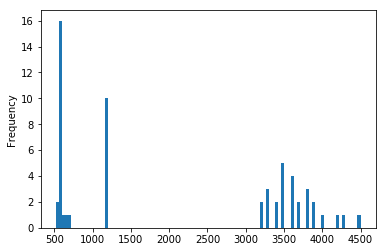

In [17]:
# df = pd.DataFrame(data = [{'vote_weights': reco['f_score']} for reco in fallback_reco])
df = pd.DataFrame(data =fallback_reco)

df[df['f_score'] > 500]['f_score'].plot(kind='hist', bins=100)

# df.hist
df[df['f_score'] > 500].shape
df[df['f_score'] > 500].permlink


In [63]:
reco_col = db.get_collection("recommendations")

In [ ]:
db.create_collection("")

In [ ]:
reco_col.find_one({'_id': 'vortac'})

In [76]:
reco_col.delete_one({'_id': 'donkeypon'})

In [7]:
raw_votes_col.count_documents({})

3883213

### Estimate size of data for eliminating trails using PCA

In [71]:
raw_votes_count = 4637378

In [2]:
%%time
a = raw_votes_col.find({}, projection={'author', 'permlink'})
unique_permlinks = set((x['author'], x['permlink']) for x in a)

CPU times: user 20.2 s, sys: 1e+03 ms, total: 21.2 s
Wall time: 27.5 s


In [3]:
len(unique_permlinks)

324178

In [4]:
distinct_voters = raw_votes_col.distinct('voter')

In [5]:
len(distinct_voters)

73595

#### One dim for post_id, one dim for each user -> PCA -> find independent dims

In [77]:
pca_repre_size_GB = raw_votes_count * (32 + len(distinct_voters) * 2) / 8 / 1024 ** 3
pca_repre_size_GB

79.33053974853829

#### One row for each voter, one-hot encoding with booleans

In [80]:
len(distinct_voters) * len(unique_permlinks) * 2 / 8 / 1024 ** 3

5.3715348553378135

## Oldest vote in the collection

In [74]:
raw_votes_col.find_one(sort=[("timestamp", 1)])

{'_id': '989c89d7b6458fa14e7e82ff4801b90381145bf5',
 'voter': 'vasigo',
 'author': 'marinauzelac',
 'permlink': '2enhpq-portrait-contest-theme-b-and-w-portraits',
 'weight': 6300,
 'type': 'vote',
 'timestamp': datetime.datetime(2018, 9, 10, 10, 0, 3),
 'block_num': 25834562,
 'trx_id': '989c89d7b6458fa14e7e82ff4801b90381145bf5'}

## Newest vote in the collection

In [75]:
raw_votes_col.find_one(sort=[("timestamp", -1)])

{'_id': '3e652d9de19b6996969432ae158fb0a0a5879835',
 'voter': 'styleyfrancky',
 'author': 'skaarl',
 'permlink': '20180917t100936334z-juxta-the-beautiful-ones-skaarls-ritmo-mix',
 'weight': 1000,
 'type': 'vote',
 'timestamp': datetime.datetime(2018, 9, 17, 10, 37, 18),
 'block_num': 26036836,
 'trx_id': '3e652d9de19b6996969432ae158fb0a0a5879835'}

In [68]:
db.list_collection_names()

['past_votes',
 'system.indexes',
 'raw_votes',
 'black_list',
 'logging',
 'manually_labeled_posts',
 'monitor',
 'user_following',
 'past_comments',
 'recommendations']

In [4]:
recommendations.delete_one({'_id': 'gavvet'})

In [48]:
query = {
    'timestamp': {
        '$lt': datetime.utcnow() - timedelta(days=1)
    }
}
raw_votes.delete_many(query)

In [61]:
logging_col.drop()

In [4]:
col = db.get_collection('recommendations')
col.remove()

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  


{'ok': 1, 'n': 1}

In [11]:
clean_posts_col.stats()

Collection(Database(MongoClient(host=['localhost:26999'], document_class=dict, tz_aware=False, connect=True), 'steem_posts'), 'clean_posts.stats')

### Get latest post

In [ ]:
from pymongo import DESCENDING
a = raw_posts_col.find().sort([("created", DESCENDING)]).limit(1)
# a = raw_posts_col.find().sort({"created": -1}).limit(1)
next(a)

In [3]:
from pymongo import ASCENDING
a = raw_votes_col.find().sort([("timestamp", ASCENDING)]).limit(1)
# a = raw_posts_col.find().sort({"created": -1}).limit(1)
next(a)

{'_id': '82c47f0bd5284a1a5a85f312cc7c1e0523d9964e',
 'voter': 'marthagomez',
 'author': 'orthodoxnudism',
 'permlink': 'asleep',
 'weight': 3000,
 'type': 'vote',
 'timestamp': datetime.datetime(2018, 6, 18, 21, 7, 57),
 'block_num': 23440101,
 'trx_id': '82c47f0bd5284a1a5a85f312cc7c1e0523d9964e'}